**Nama: Asyfa Nabilla Rahmi** <br>
**NIM: 211351033** <br>
**Kelas: Pagi A** <br>

In [1]:
#import dataset dari kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asyfanabilla","key":"b1bc6b280d5b450963cadd8a53557d8c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 37.6MB/s]


In [4]:
!mkdir breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip -d breast-cancer-wisconsin-data
!ls breast-cancer-wisconsin-data

Archive:  breast-cancer-wisconsin-data.zip
  inflating: breast-cancer-wisconsin-data/data.csv  
data.csv


In [5]:
# import library

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df = pd.read_csv('breast-cancer-wisconsin-data/data.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# mengurangi jumlah kolom dengan fungsi df.drop

df.drop(columns=['id', 'Unnamed: 32', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean',	'radius_se',	'texture_se',	'perimeter_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se',	'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diagnosis         569 non-null    object 
 1   radius_mean       569 non-null    float64
 2   texture_mean      569 non-null    float64
 3   perimeter_mean    569 non-null    float64
 4   area_mean         569 non-null    float64
 5   smoothness_mean   569 non-null    float64
 6   compactness_mean  569 non-null    float64
 7   concavity_mean    569 non-null    float64
 8   area_se           569 non-null    float64
 9   smoothness_se     569 non-null    float64
dtypes: float64(9), object(1)
memory usage: 44.6+ KB


In [11]:
# melihat data yang kosong (null)

df.isnull().sum()

diagnosis           0
radius_mean         0
texture_mean        0
perimeter_mean      0
area_mean           0
smoothness_mean     0
compactness_mean    0
concavity_mean      0
area_se             0
smoothness_se       0
dtype: int64

In [12]:
# memisahkan kolom numerik dan kategorikal dan mengisi nilai yang hilang

numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype== 'int64' :
      numerical.append(col)
    else:
      catgcols.append(col)

for col in df.columns:
    if col in numerical:
      df[col].fillna(df[col].median(), inplace=True)
    else:
      df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
numerical

[]

In [14]:
catgcols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'area_se',
 'smoothness_se']

In [15]:
# menentukan label

ind_col = [col for col in df.columns if col != 'diagnosis']
dep_col = 'diagnosis'

In [16]:
# mengubah kolom-kolom kategorikal di DataFrame df menjadi format numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [17]:
x = df[ind_col] #features
y = df[dep_col] #label

In [18]:
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [19]:
# membagi data latih dan data uji

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (398, 9)
test shape: (171, 9)


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# membuat dan konfigurasi model jaringan saraf untuk tugas klasifikasi teks menggunakan TensorFlow

model = Sequential([
    Dense(120, activation='relu', input_dim=9),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               1200      
                                                                 
 dense_1 (Dense)             (None, 64)                7744      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9009 (35.19 KB)
Trainable params: 9009 (35.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


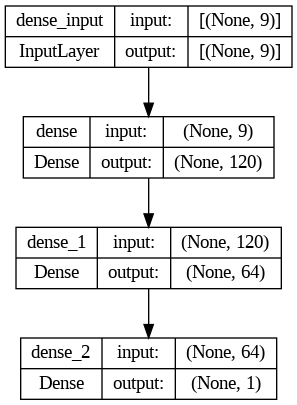

In [22]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [23]:
# melatih model dengan data yang telah diproses sebelumnya

from tensorflow.keras.optimizers import Adam
optim = Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optim,
              metrics=['acc'])
batch_size=32
epochs = 150

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/150
12/12 [==============================] - 2s 37ms/step - loss: 0.6734 - acc: 0.6872 - val_loss: 0.6361 - val_acc: 0.8500
Epoch 2/150
12/12 [==============================] - 0s 10ms/step - loss: 0.6142 - acc: 0.8240 - val_loss: 0.6088 - val_acc: 0.7500
Epoch 3/150
12/12 [==============================] - 0s 9ms/step - loss: 0.5597 - acc: 0.8184 - val_loss: 0.5508 - val_acc: 0.8250
Epoch 4/150
12/12 [==============================] - 0s 8ms/step - loss: 0.4961 - acc: 0.8547 - val_loss: 0.4736 - val_acc: 0.8750
Epoch 5/150
12/12 [==============================] - 0s 8ms/step - loss: 0.4283 - acc: 0.8520 - val_loss: 0.4363 - val_acc: 0.8250
Epoch 6/150
12/12 [==============================] - 0s 9ms/step - loss: 0.3723 - acc: 0.8743 - val_loss: 0.3593 - val_acc: 0.8750
Epoch 7/150
12/12 [==============================] - 0s 7ms/step - loss: 0.3269 - acc: 0.8827 - val_loss: 0.3159 - val_acc: 0.9000
Epoch 8/150
12/12 [==============================] - 0s 9ms/step - loss: 0.2853 -

In [24]:
# evaluasi kinerja model machine learning

model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0989 - acc: 0.9708


[0.09894904494285583, 0.9707602262496948]

In [25]:
#malignant = 1
#benign = 0
if model.predict([[370, 1,  455,    452,    444,    531,    521,    515,    277]]) == 0:
  print('Benign (B)')
else:
  print('Malignant (M)')

1/1 [==============================] - 0s 108ms/step
Malignant (M)


In [26]:
#malignant = 1
#beningn = 0
if model.predict([[3,	414,	1,	3,	0,	37,	0,	152,	345]]) == 0:
  print('Benign (B)')
else:
  print('Malignant (M)')

1/1 [==============================] - 0s 40ms/step
Benign (B)


In [27]:
#save model

model.save('./breast.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import tensorflow as tf
model = tf.keras.models.load_model('./breast.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./breast.tflite", "wb").write(tflite_model)

11944